In [1]:
import pandas as pd
df = pd.read_csv('data/diabetes.csv')

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel
# X = df[df.columns[:8]]
data = df.drop(['Outcome'], axis=1)

# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
label = df['Outcome']

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


axes merupakan array dan metode flat digunakan untuk mengiterasi https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flat.html?highlight=flat

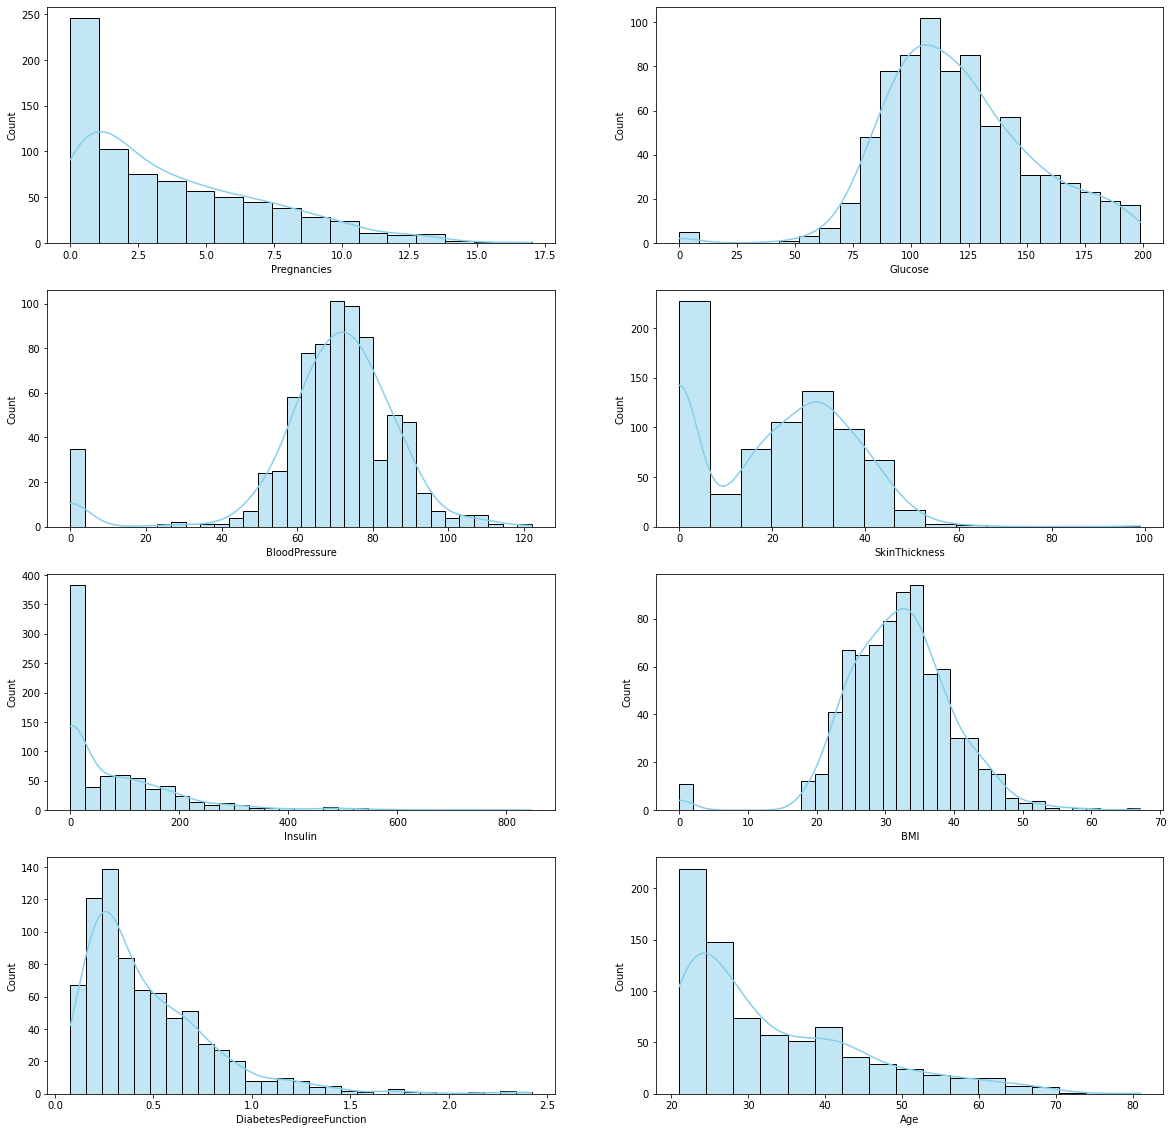

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.histplot(data['Glucose'], kde=True)

f, axes = plt.subplots(4, 2, figsize=(20, 20), sharex=False)
for ax, feature in zip(axes.flat, data.columns):
    sns.histplot(data[feature], kde=True, color="skyblue", ax=ax)

https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num Hasil fit transform menjadi dataframe

In [7]:
from sklearn.preprocessing import StandardScaler

# standarisasi nilai-nilai dari dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.values)
scaled_data_df = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

In [8]:
scaled_data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


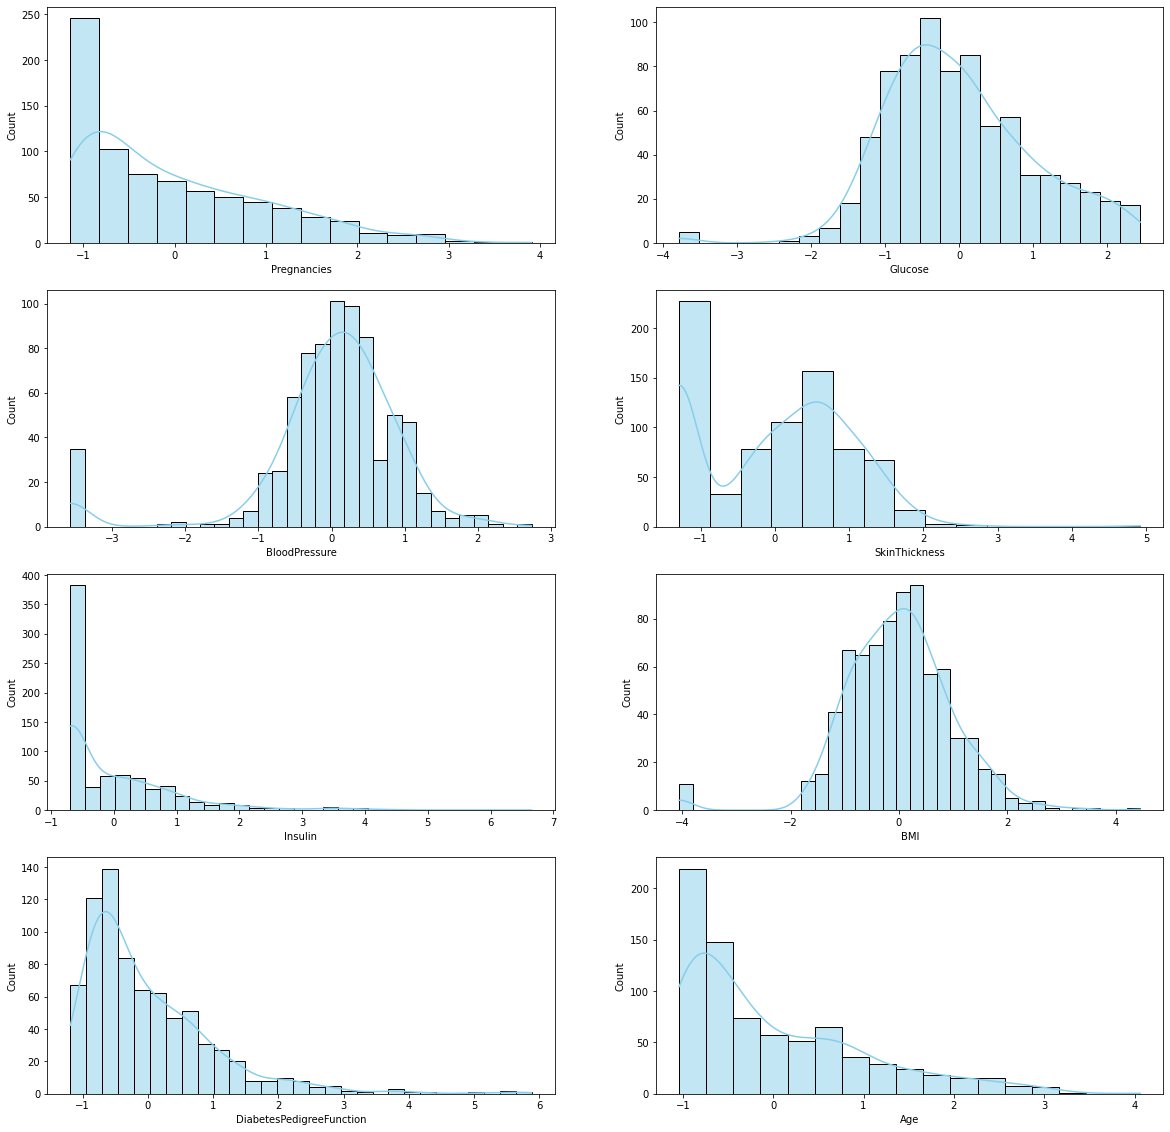

In [9]:
f, axes = plt.subplots(4, 2, figsize=(20, 20), sharex=False)
for ax, feature in zip(axes.flat, scaled_data_df.columns):
    sns.histplot(scaled_data_df[feature], kde=True, color="skyblue", ax=ax)

## Membandingkan hasil data yang ditransformasi distribusi normal dengan yang tidak.

In [11]:
import numpy as np

X_norm = scaled_data_df.transform(np.log1p)
y_norm = label.transform(np.log1p)

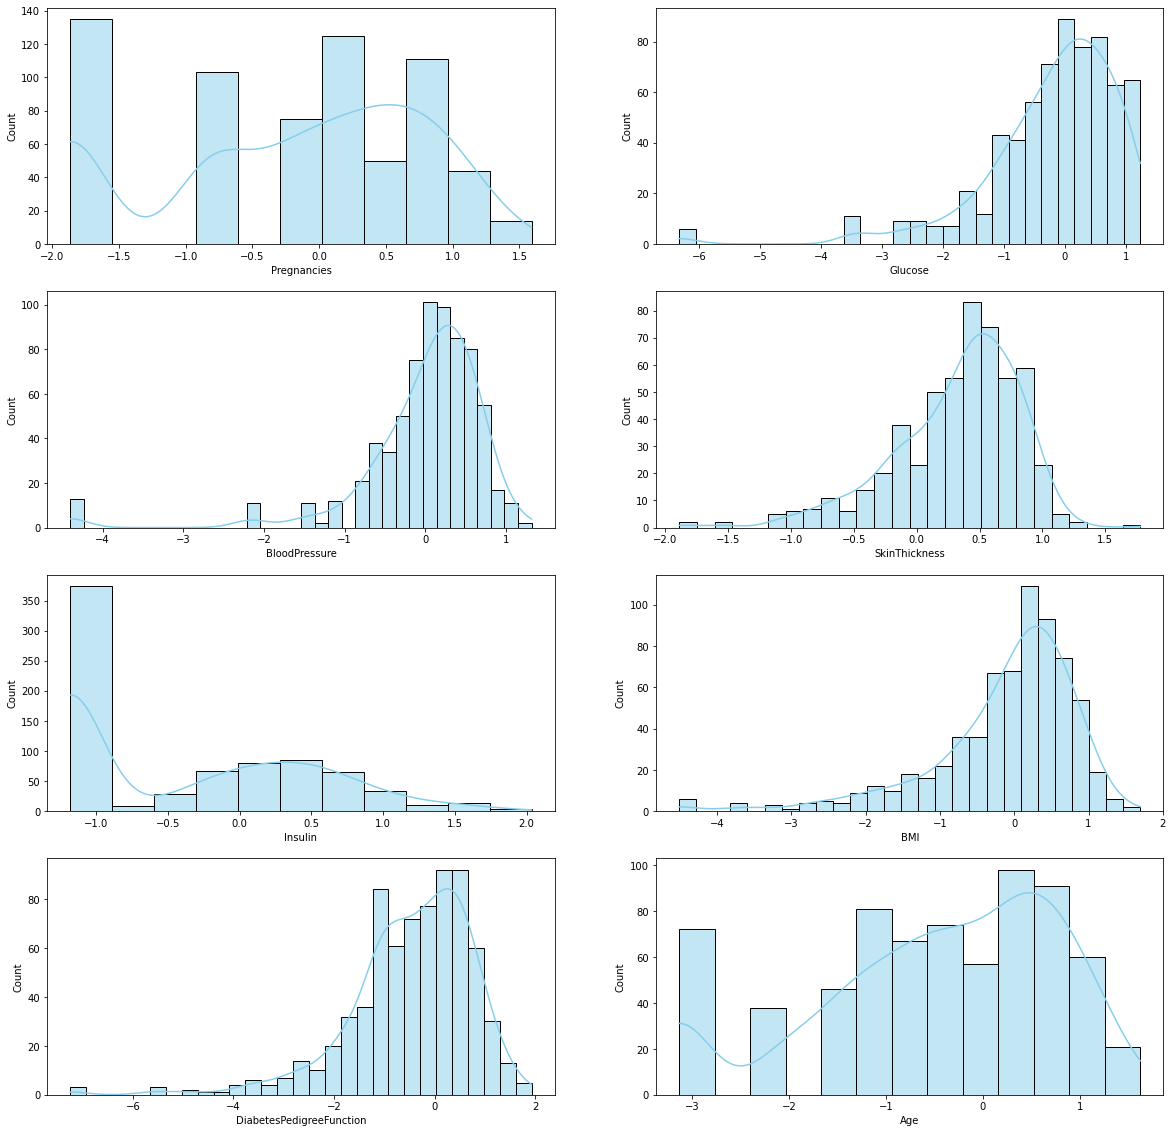

In [12]:
f, axes = plt.subplots(4, 2, figsize=(20, 20), sharex=False)
for ax, feature in zip(axes.flat, X_norm.columns):
    sns.histplot(X_norm[feature], kde=True, color="skyblue", ax=ax)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

# **Support Vector Regressor**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('data.csv')

In [ ]:
data.info()

In [ ]:
data.head()

In [ ]:
data = data.drop(columns=['date'])

In [ ]:
X = data[data.columns[1:]]  # all rows, no label
y = data['number_people'] 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.svm import SVR
model = SVR(kernel='rbf')

In [ ]:
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

# **Support Vector Regressor**

In [ ]:
https://www.kaggle.com/vivinbarath/simple-linear-regression-for-salary-data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Salary_Data.csv')

In [ ]:
data.info()

In [ ]:
data.head()

In [ ]:
import numpy as np

X = data['YearsExperience']
y = data['Salary']
X = X[:,np.newaxis]

In [ ]:
from sklearn.svm import SVR
model  = SVR(C=1000, gamma=0.05, kernel='rbf')
model.fit(X,y)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model.predict(X))

In [ ]:
from sklearn.model_selection import GridSearchCV

svrgs_parameters = {
    'kernel': ['rbf'],
    'C':     [150000,200000,250000],
    'gamma': [0.004,0.0045,0.005]
}
clf = SVR()

#svm.SVR()
svr_cv = GridSearchCV(clf, svrgs_parameters, cv=8)
svr_cv.fit(X,y)
print("SVR GridSearch score: "+str(svr_cv.best_score_))
print("SVR GridSearch params: ")
print(svr_cv.best_params_)